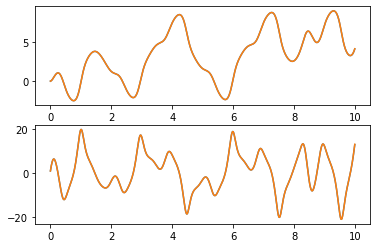

In [94]:
## Example of the code versus the Scipy Solver

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

tmin, tmax, dt = 0, 10, 0.01

# parametreters of the system.
om = 2*np.pi
om_0 = 1.5*om
b = om_0 * 0.25
gamma = 1.073

# Note: see RK4.py for a slightly different way on using parameters. here they are passed into the actual DE solver
# and system function as parameters which is slightly more complicated but can be useful
# in certain situations like making bifurcation diagrams

#Consider the driven damped pendulum for this example
def f(L, t, om, om_0, b, g):
    """
    System of differential equations you want to solve.
    t is your time series array you want to solve on
    L is the list containing all of your variables

    om, om_0, b, g are parameters of the system

    returns a list of functions with the i'th function corresponding to 
    the derivative of the ith variable
    """
    x1, x2 = L
    dxdt = [x2, -2*b*x2 - (om_0**2)*np.sin(x1) + g*(om_0**2)*np.cos(om*t)]
    return dxdt

ics = [0, 1] #initial conditions for x1 and x2 respectively

t = np.arange(tmin, tmax, dt) #time range we are solving on

def RK4(f, ic, time, om, om_0, b, g):
    """
    takes a list of functions f, a list of initial conditions ic, and
    a numpy array for all the times you want solutions on

    if n is how many variables you have, and there are t* time points
    the then output will be a (t*, n) sized numpy array where every row
    is the solution at the corresponding time

    om, om_0, b, and g
    are all parameters of the system so they must be included.
    """
    n = len(ic)
    dt = (tmax - tmin)/len(time) #timestep; here so that you only need to input the time array
    ans = []
    L = ic
    for t in time:
        ans.append(L)
        k1 = [dt * xi for xi in f(L, t, om, om_0, b, g)]
        k2 = list(map(lambda x: dt*x, f([L[i] + 0.5*k1[i] for i in range(n)], t+0.5*dt, om, om_0, b, g)))
        k3 = list(map(lambda x: dt*x, f([L[i] + 0.5*k2[i] for i in range(n)], t+0.5*dt, om, om_0, b, g)))
        k4 = list(map(lambda x: dt*x, f([L[i] + k3[i] for i in range(n)], t+dt, om, om_0, b, g)))
        L = [L[i] + 1/6 * (k1[i] + 2*k2[i] + 2*k3[i] + k4[i]) for i in range(n)]
    
    return np.array(ans, dtype="float") #Turning everything into a numpy array

data = RK4(f, ics, t, om, om_0, b, gamma) # our solution shall be called "data"

sol = odeint(f, ics, t, args=(om, om_0, b, gamma)) #Same system is solved using the odeint funtion from scipy.integrate

fig, axs = plt.subplots(2)

axs[0].plot(t, sol[:,0])  #x1 with scipy
axs[0].plot(t, data[:,0]) #x1 with my code

axs[1].plot(t, sol[:,1])  #x2 with scipy
axs[1].plot(t, data[:,1]) #x2 with my code

# My solution and Scipy's solution are overlayed to easily spot any large deviencies
# Notice: This is a chaotic system so things *will* janky if you satrt varying parameters
# Espescially gamma

In [97]:
#Checking the error of our solution vs scipy

toll = 1e-4 # Maximum tollerance
err = abs(sol-data) # define the error array

print((err>toll).any()) #checks if the are any values in err that are larger than the max tolerance

#If you see true, that means that the is atleast one value whose error is larger than toll
#otherwise, you will get false

#percentage of values where the error is above toll for *either* x1 and x2 
print(np.size(err[err>toll])/np.size(err)) 

True
0.386


In [99]:
#Error part two

print("First 10 times where the error in x1 is larger than toll:")
print(t[(err>toll)[:,0].flatten()][:10])
print("Number of times times where the error in x1 is larger than toll and the percentage:")
print(np.size(t[(err>toll)[:,0].flatten()]), np.size(t[(err>toll)[:,0].flatten()])/np.size(t))
print("")
print("First 10 times where the error in x2 is larger than toll:")
print(t[(err>toll)[:,1].flatten()][:10])
print("Number of times times where the error in x2 is larger than toll and the percentage:")
print(np.size(t[(err>toll)[:,1].flatten()]), np.size(t[(err>toll)[:,1].flatten()])/np.size(t))
print("")
print("First 10 instances where err is larger than toll in either x1 or x2:")
print(err[err>toll][:10])
print("")
print("Last 10 instances where err is larger than toll in either x1 or x2:")
print(err[err>toll][-10:])

First 10 times where the error in x1 is larger than toll:
[7.24 7.25 7.26 7.27 7.28 7.29 7.3  7.31 7.32 7.33]
Number of times times where the error in x1 is larger than toll and the percentage:
275 0.275

First 10 times where the error in x2 is larger than toll:
[1.77 1.78 1.79 1.8  1.81 1.82 1.83 1.84 1.85 1.86]
Number of times times where the error in x2 is larger than toll and the percentage:
497 0.497

First 10 instances where err is larger than toll in either x1 or x2:
[0.00010131 0.00010748 0.0001136  0.00011958 0.00012532 0.0001307
 0.0001356  0.00013991 0.00014351 0.00014628]

Last 10 instances where err is larger than toll in either x1 or x2:
[0.01955348 0.13283096 0.02092156 0.1407094  0.02236587 0.14801854
 0.02387889 0.15437538 0.02544877 0.15930274]
